In [1]:
import pandas as pd
import numpy as np 
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.feature_extraction import _dict_vectorizer
import seaborn as sns

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [10]:
df.isna()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [11]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df.dropna().sum()

review       One of the other reviewers has mentioned that ...
sentiment    positivepositivepositivenegativepositivepositi...
dtype: object

In [13]:
df.shape

(50000, 2)

In [15]:
df.head(3).sum()

review       One of the other reviewers has mentioned that ...
sentiment                             positivepositivepositive
dtype: object

In [16]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [18]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [22]:
# Load IMDB dataset with top 10,000 most frequent words
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training data: ", X_train.shape)
print("Test data: ", X_test.shape)

17464789/17464789 [==============================] - 122s 7us/step
Training data:  (25000,)
Test data:  (25000,)


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum review length (e.g., 200 words)
max_len = 200

# Pad the sequences so each input is of length max_len
X_train_padded = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_len, padding='post')

print("Padded training data shape: ", X_train_padded.shape)
print("Padded test data shape: ", X_test_padded.shape)


Padded training data shape:  (25000, 200)
Padded test data shape:  (25000, 200)


In [80]:
 
# Prepare embeddings matrix
embedding_dim = 100  # or 300 for larger embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
# Load your GloVe or Word2Vec embeddings into the matrix

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 100)         2000000   
                                                                 
 lstm_3 (LSTM)               (None, None, 100)         80400     
                                                                 
 dropout_23 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,160,901
Trainable params: 160,901
Non-

In [83]:
batch_size = 64
epochs = 5

history = model.fit(X_train_padded, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test_padded, y_test))


Epoch 1/5
391/391 [==============================] - 394s 992ms/step - loss: 0.6935 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
391/391 [==============================] - 382s 978ms/step - loss: 0.6935 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
391/391 [==============================] - 351s 898ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
391/391 [==============================] - 477s 1s/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
391/391 [==============================] - 504s 1s/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000


In [85]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


782/782 [==============================] - 42s 53ms/step - loss: 0.6156 - accuracy: 0.6427
Test Accuracy: 64.27%


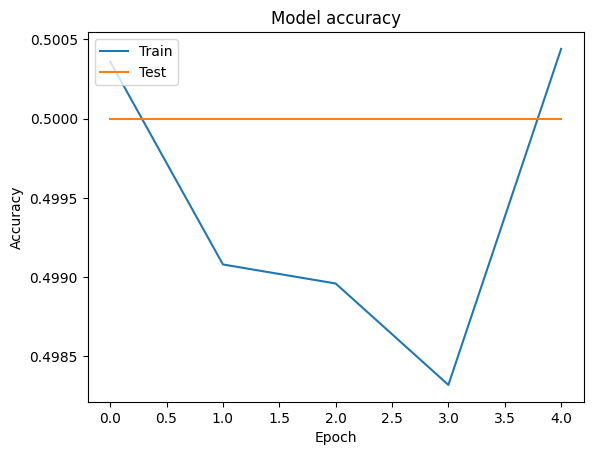

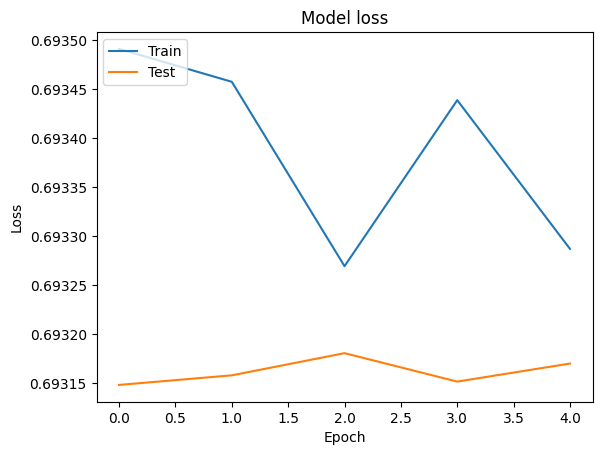

In [86]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [87]:
model.save('imdb_sentiment_model.h5')


In [88]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('imdb_sentiment_model.h5')

# Example prediction
new_review = [1, 14, 22, 16, 43, 530, 973, 1622, 1385]  # Example tokenized review
new_review_padded = pad_sequences([new_review], maxlen=max_len, padding='post')
predicted_sentiment = model.predict(new_review_padded)

if predicted_sentiment >= 0.5:
    print("Positive Review")
else:
    print("Negative Review")


1/1 [==============================] - 1s 728ms/step
Positive Review


In [89]:
# Accuracy IMprovement

# Vocabulary Size


model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))


In [90]:
model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))

# embedding_dim = 100  # Set this according to your pre-trained embeddings


In [91]:
# Define the embedding dimension
embedding_dim = 100  # or 200, depending on your pre-trained embeddings
pretrained_embedding = 100
max_length = 50
embedding_layer = Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            weights=[pretrained_embedding], 
                            input_length=max_length, 
                            trainable=False)


In [92]:
# Assuming you have already created your vocab_size and pretrained_embedding
vocab_size = 20000  # example vocab size
pretrained_embedding = ...  # Load your pre-trained embeddings here

# Define the embedding dimension
embedding_dim = 100  # Set this according to your pre-trained embeddings

# Create the embedding layer
embedding_layer = Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            weights=[pretrained_embedding], 
                            input_length=max_length, 
                            trainable=False)

